In [128]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [129]:
!py -m pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [131]:
df = pd.concat([X, y], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [133]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [134]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)

C:\Users\ayaha\AppData\Local\Temp\ipykernel_22804\2226264172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna(df['job'].mode()[0], inplace=True)
C:\Users\ayaha\AppData\Local\Temp\ipykernel_22804\2226264172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [135]:
cleaned_df=df.drop('poutcome', axis=1)

In [136]:
cleaned_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [137]:
cleaned_df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64

In [138]:
cleaned_df['default'].value_counts()
cleaned_df.drop('default', axis=1, inplace=True)

In [139]:
cleaned_df.duplicated().sum()

np.int64(0)

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
le = LabelEncoder()
for col in cleaned_df.columns:
    if cleaned_df[col].dtype == 'object':
        cleaned_df[col] = le.fit_transform(cleaned_df[col])


In [142]:
cleaned_df.head()

,age,job,marital,education,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,4,1,2,2143,1,0,0,5,8,261,1,-1,0,0
1,44,9,2,1,29,1,0,0,5,8,151,1,-1,0,0
2,33,2,1,1,2,1,1,0,5,8,76,1,-1,0,0
3,47,1,1,1,1506,1,0,0,5,8,92,1,-1,0,0
4,33,1,2,1,1,0,0,0,5,8,198,1,-1,0,0


In [143]:
corr = cleaned_df.corr()

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

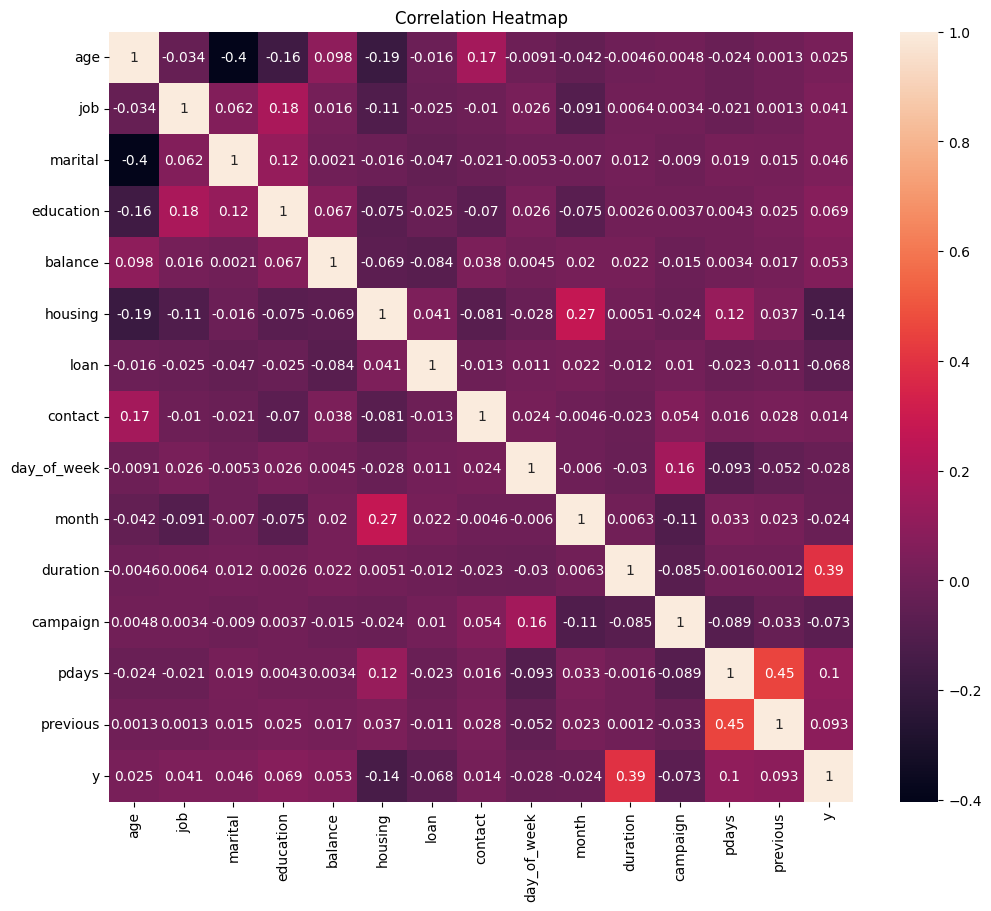

In [145]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [146]:
cleaned_df.drop(columns=['contact','age', 'month', 'day_of_week'], axis=1, inplace=True)

In [147]:
cleaned_df

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y
0,4,1,2,2143,1,0,261,1,-1,0,0
1,9,2,1,29,1,0,151,1,-1,0,0
2,2,1,1,2,1,1,76,1,-1,0,0
3,1,1,1,1506,1,0,92,1,-1,0,0
4,1,2,1,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,825,0,0,977,3,-1,0,1
45207,5,0,0,1729,0,0,456,2,-1,0,1
45208,5,1,1,5715,0,0,1127,5,184,3,1
45209,1,1,1,668,0,0,508,4,-1,0,0


In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [149]:
X = cleaned_df.drop('y', axis=1)
y = cleaned_df['y']

In [150]:
x_scaled = StandardScaler().fit_transform(X)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [153]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [154]:
y_pred = dt.predict(x_test)

In [155]:
dt.score(x_test, y_test)

0.8518190865863099

In [156]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.39050131926121373
Recall: 0.4069660861594867
F1 Score: 0.3985637342908438
Accuracy: 0.8518190865863099


In [157]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [158]:
y_pred2 = rf.predict(x_test)

In [159]:
rf.score(x_test, y_test)

0.8883114010837112

In [160]:
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Precision: 0.5598227474150664
Recall: 0.3473877176901925
F1 Score: 0.4287330316742081
Accuracy: 0.8883114010837112


In [161]:
cleaned_df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [162]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE()
x_train, y_train= smote.fit_resample(x_train, y_train)

In [163]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
dt.score(x_test, y_test)
y_pred_smote = dt.predict(x_test)

In [170]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_test, y_test)
y_pred2_smote = rf.predict(x_test)

In [165]:
y_train.value_counts()

y
0    31970
1    31970
Name: count, dtype: int64

In [171]:
print(precision_score(y_test, y_pred_smote))
print(recall_score(y_test, y_pred_smote))
print(f1_score(y_test, y_pred_smote))

0.32917705735660846
0.48395967002749773
0.39183673469387753


In [172]:
print(precision_score(y_test, y_pred2_smote))
print(recall_score(y_test, y_pred2_smote))
print(f1_score(y_test, y_pred2_smote))

0.43902439024390244
0.5609532538955087
0.49255533199195173
